# Bagging and Boosting to Expedite Visa Approval

## Context

America thrives on industry. According to the U.S. Small Business Administration, there are more than 33.2 million small businesses registered in the United States. With so many companies, there is considerable demand for employees. Hard-working and qualified employees are the backbone of any successful enterprise, and sometimes the best candidates live abroad. 

The Immigration and Nationality Act (INA) permits foreign workers to come to the US on either a temporary or permanent basis. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC). 

The OFLC must optimize the visa approval process to ensure that qualified foreign candidates are allowed to legally work in the US. 

## Objective

In 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the year before. As the number of applications increases every year, the review process is becoming more time-intensive.

Luckily, **we can build a machine learning solution to shortlist candidates with higher chances of visa approval.** With the help of a classification model, we will:

* Facilitate the visa approval process.
* Create a general profile of a suitable candidate for reference.


## Data Dictionary

We will be using the 'EasyVisa' dataset sourced through the Great Learning data archive. Below are column descriptions that were provided with the dataset:

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Table of Contents

1. [Data Overview](#data_overview)
2. [Exploratory Data Analysis](#eda)
3. [Data Preprocessing](#data_preprocessing)
4. [EDA cont'd](#eda_contd)
5. [Building Bagging and Boosting Models](#bagging_boosting)
6. [Hyperparameter Tuning](#hyperparameter_tuning)
7. [Model Performance Comparison and Conclusions](#model_comparison)
8. [Feature Importance](#feature_importance)
9. [Actionable Insights and Recommendations](#insights_recs)


## Importing Libraries and Data

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# library to split data
from sklearn.model_selection import train_test_split

# libraries to build classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


# for model tuning
from sklearn.model_selection import GridSearchCV

# to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# for formatting
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

## Data Overview <a id='data_overview'></a>

In [3]:
print(f"There are", df.shape[0], "rows and", df.shape[1], "columns")

There are 25480 rows and 12 columns


<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

- The majority of columns are object data type.
- We will have to convert these to numeric data types in order to build our models.
- There do not appear to be missing values in any column.

In [5]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

- As stated above, there are no missing values.

In [6]:
df.sample(10, random_state=1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


<IPython.core.display.Javascript object>

- The ``case_id`` column can be dropped.
- `continent` and `education_of_employee` will need to be converted to dummy variables.
- `has_job_experience` and `requires_job_training` will need to be converted to 1s and 0s for yes/no values.
- `region_of_employment` will also need to be converted to a dummy variable.
- `prevailing_wage` contains values for both hourly and yearly compensation.
    - `unit_of_wage` dictates whether the wage value is an hourly or yearly rate.
    - We will need to merge the information in these columns and convert them to a single compensation rate for easy comparison and analysis.
- `full_time_position` and `case_status` will also need to be converted to 1s and 0s.

In [7]:
# creating a copy of the data frame
df1 = df.copy()

# dropping the case_id column
df1.drop("case_id", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [8]:
# viewing wage unit values
df1.unit_of_wage.value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

- While the vast majority of wages are recorded as a yearly rate, there are also hourly, weekly, and monthly rates as well.
- While the wage numbers are all in the same `prevailing_wage` column, some rows have different wage units. Thus, they cannot be compared.
- OECD data from 2016 reveals that US workers worked 1,778 hours per year on average. The description below states how the calculation was made:

"Average annual hours worked is defined as the total number of hours actually worked per year divided by the average number of people in employment per year. Actual hours worked include regular work hours of full-time, part-time and part-year workers, paid and unpaid overtime, hours worked in additional jobs, and exclude time not worked because of public holidays, annual paid leave, own illness, injury and temporary disability, maternity leave, parental leave, schooling or training, slack work for technical or economic reasons, strike or labour dispute, bad weather, compensation leave and other reasons."
(https://data.oecd.org/emp/hours-worked.htm)

- While this may not be a perfect metric, it is useful enough for our purposes. I will use this yearly average to convert all hourly wages into a yearly wage rate. This will allow us to compare values within this column.
- I will convert weekly and monthly rates by multiplying wages by 52 and 12 respectively.
- Again, this is not perfect and does not individually account for full vs. part time, number of billable vs. nonbillable hours, vacation time, and sick days. But it will do for our purposes.
- In the future, it would be useful to standardize the collection of wage data in order to remove this uncertainty.

In [9]:
# assigning conversion rates to variables
hour_conversion = 1778
week_conversion = 52
month_conversion = 12

# converting prevailing wages to yearly values based on wage units
hour_mask = df1["unit_of_wage"] == "Hour"  # selecting only rows with "Hour" wage units
df1["prevailing_wage"][hour_mask] = (
    df1["prevailing_wage"][hour_mask] * hour_conversion
)  # converting hourly to yearly
week_mask = df1["unit_of_wage"] == "Week"  # same method as above
df1["prevailing_wage"][week_mask] = df1["prevailing_wage"][week_mask] * week_conversion
month_mask = df1["unit_of_wage"] == "Month"
df1["prevailing_wage"][month_mask] = (
    df1["prevailing_wage"][month_mask] * month_conversion
)

# dropping the unit of wage column
df1.drop("unit_of_wage", axis=1, inplace=True)
# renaming prevailing_wage to annual_income
df1.rename(columns={"prevailing_wage": "annual_income"}, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
df1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,annual_income,full_time_position,case_status
17639,Asia,Bachelor's,Y,N,567,1992,Midwest,2.684291e+04,Y,Certified
23951,Oceania,Bachelor's,N,N,619,1938,Midwest,6.641998e+04,Y,Certified
8625,Asia,Master's,N,N,2635,2005,South,1.577605e+06,Y,Certified
20206,Asia,Bachelor's,Y,Y,3184,1986,Northeast,4.943580e+04,Y,Certified
7471,Europe,Bachelor's,Y,N,4681,1928,West,4.986519e+04,Y,Denied
3433,Asia,Bachelor's,Y,N,222,1989,South,1.446805e+06,Y,Certified
24440,Europe,High School,N,Y,3278,1994,South,2.049484e+05,Y,Denied
12104,Asia,Master's,Y,N,1359,1997,West,2.022370e+05,N,Certified
15656,Asia,Bachelor's,N,N,2081,2003,West,1.117130e+05,Y,Denied
23110,North America,Bachelor's,Y,N,854,1998,Northeast,7.909001e+05,Y,Denied


<IPython.core.display.Javascript object>

- Our income values look much better and we are ready to move forward.

In [11]:
df1.describe()

,no_of_employees,yr_of_estab,annual_income
count,25480.000000,25480.000000,2.548000e+04
mean,5667.043210,1979.409929,1.867924e+05
std,22877.928848,42.366929,5.607416e+05
min,-26.000000,1800.000000,1.000000e+02
25%,1022.000000,1976.000000,4.708347e+04
50%,2109.000000,1997.000000,8.275174e+04
75%,3504.000000,2005.000000,1.247108e+05
max,602069.000000,2016.000000,1.456915e+07


<IPython.core.display.Javascript object>

**Observations**:
- `no_of_employees`
    - The minimum `no_of_employees` is -26, which cannot be possible. This must be an error.
    - We will convert the negative values in this column to positive values.
    - The maximum number of employees is 602,069, which indicates there are outliers in this column.
    - The standard deviation is 22,877, indicating a high variability and large distances between values.
- `yr_of_estab`
    - The oldest company was founded in 1800 and the most recent is 2016, the year our data was collected.
    - The median is higher than the mean, indicating that the data is left-skewed.
- `annual_income`
    - The mean income is \$186,792.37.
    - The lowest income is \\$100 and the highest is \$14,569,149.40.
    - We will probably have to treat these outliers before building our models.
- Most columns are not included in the statistical summary because they are not numeric. We will convert them during pre-processing.

In [12]:
# converting negative values in no_of_employees column to positive values
df1["no_of_employees"][df1["no_of_employees"] < 0] = abs(
    df1["no_of_employees"][df1["no_of_employees"] < 0]
)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA) <a id='eda'></a>

I will first define a few functions to help visualize our data.

In [13]:
# defining a histogram boxplot function
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # the boxplot
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # adding the mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # adding the median to the histogram
    plt.show()


# defining a labeled barplot function
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()


# defining a stacked barplot function
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Univariate Analysis

#### Continent

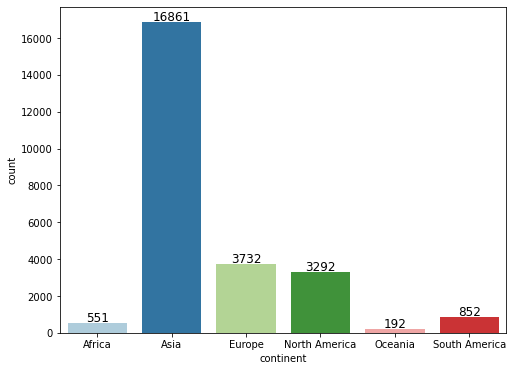

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data=df1, feature="continent")

- Most applicants are from Asia (16,861 applicants).
- The next most common continent of origin is Europe, followed closely by North America.
- Only 192 applicants are from Oceania.

#### Education of Employee

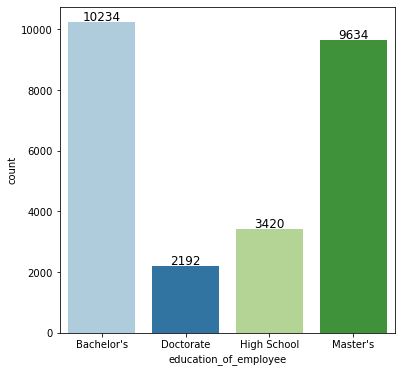

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data=df1, feature="education_of_employee")

- 10,234 applicants have a bachelor's degree.
- Slightly fewer have master's degrees (9,634 applicants).
- 2,192 applicants have doctorates.
- These numbers reveal that most candidates are fairly well educated, and many are likely being recruited to work in the US based on their credentials.

#### Has Job Experience

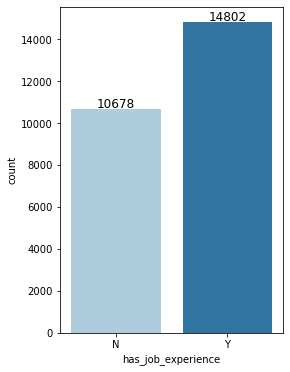

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data=df1, feature="has_job_experience")

- 10,678 applicants do not have any job experience -- a surprisingly high amount.
- Perhaps many of these applicants are recent graduates looking to begin a career abroad.
- The majority of applicants do have job experience (14,802 applicants).

#### Requires Job Training

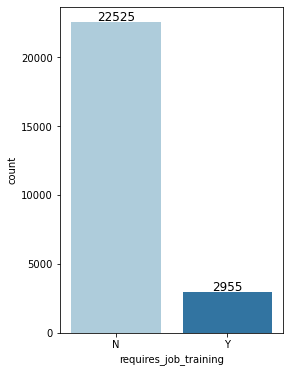

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data=df1, feature="requires_job_training")

- The vast majority of candidates do not require job training.

#### Number of Employees

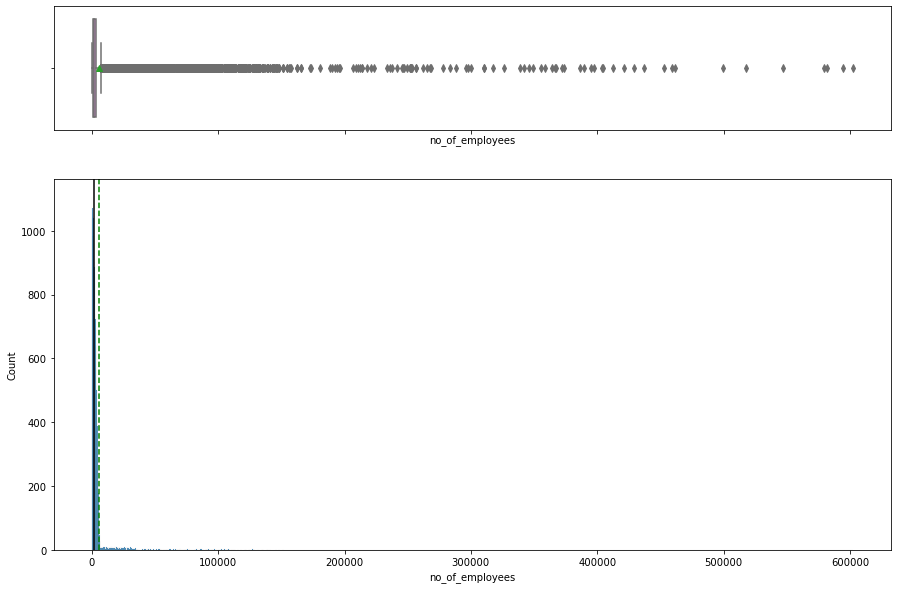

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data=df1, feature="no_of_employees")

- The number of employees is extremely right skewed.
- Most companies are fairly small, evident by the mean, median, and collapsed boxplot all falling just right of 0 on this graph.
- There are several outliers going up to around 600,000 employees.

#### Year Established

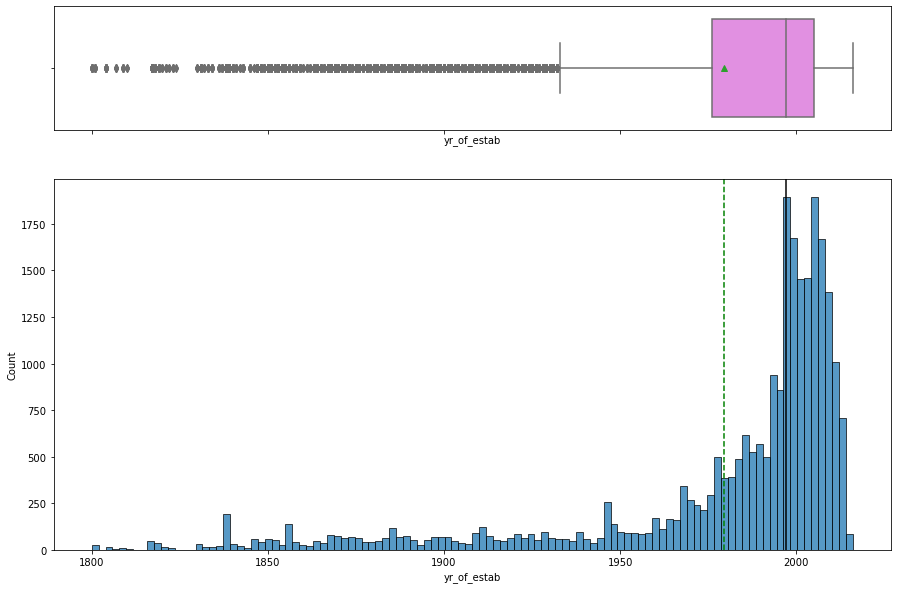

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data=df1, feature="yr_of_estab")

- Year established is left-skewed, with 50% of companies being founded between 1975 and 2005. 
- The median year established is around 1995.

#### Region of Employment

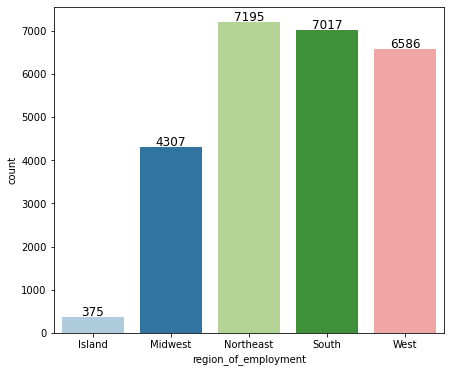

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data=df1, feature="region_of_employment")

- The highest number of applicants are seeking jobs in the northeast, followed closely by the southern US.
- Only 375 applicants were seeking jobs on an island, likely because there are not many jobs available in those regions.

#### Annual Income

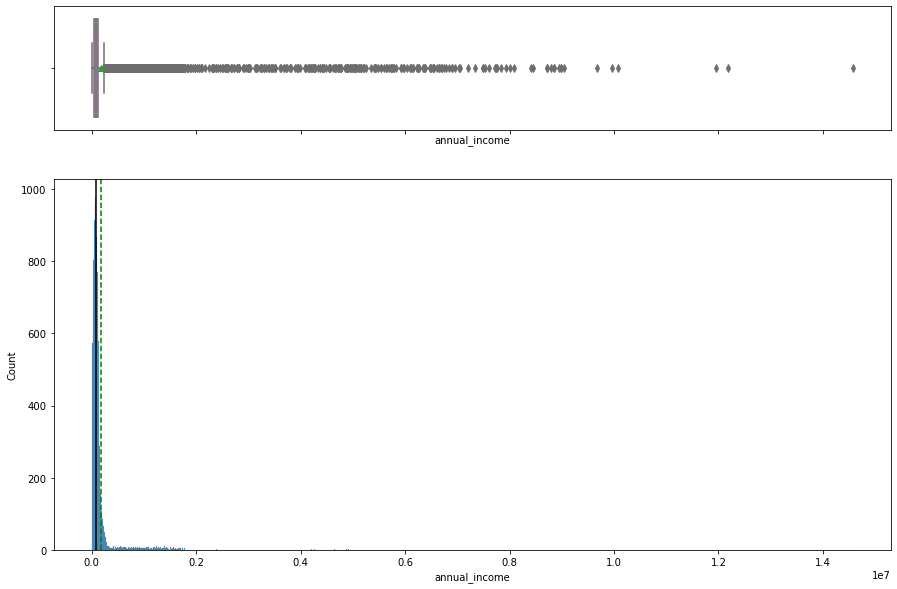

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data=df1, feature="annual_income")

- Annual income (the prevailing annual income for the position sought) is extremely right-skewed.

#### Full Time Position

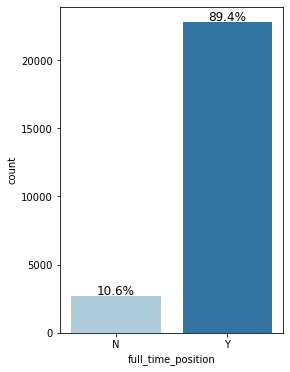

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data=df1, feature="full_time_position", perc=True)

- 90% of jobs are full time positions.
- Only around 10% are part time.

#### Case Status

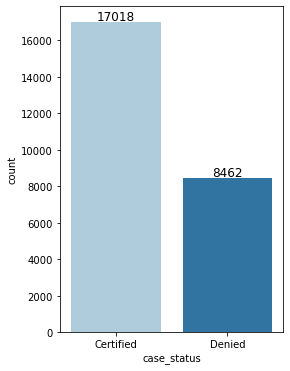

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data=df1, feature="case_status")

- 17,018 applications were certified -- almost 2/3rds.

### Bivariate Analysis

#### Continent vs. Case Status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


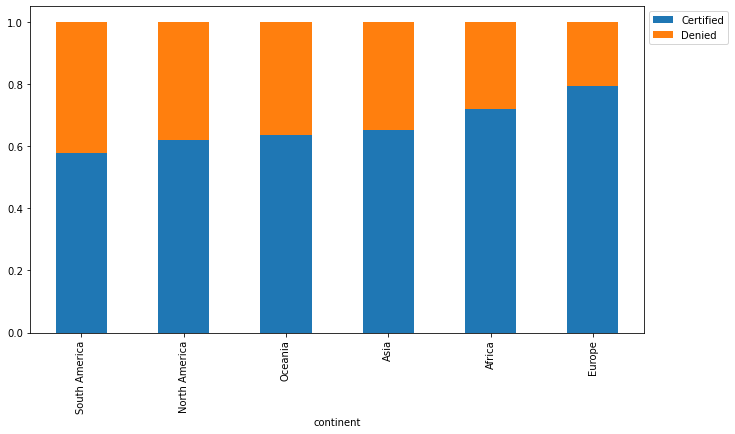

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(data=df1, predictor="continent", target="case_status")

- South American applicants had the smallest proportion of accepted applications (only 0.58 accepted), whereas Europe had the most (roughly 0.8 accepted).

#### Education of Employee vs. Case Status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


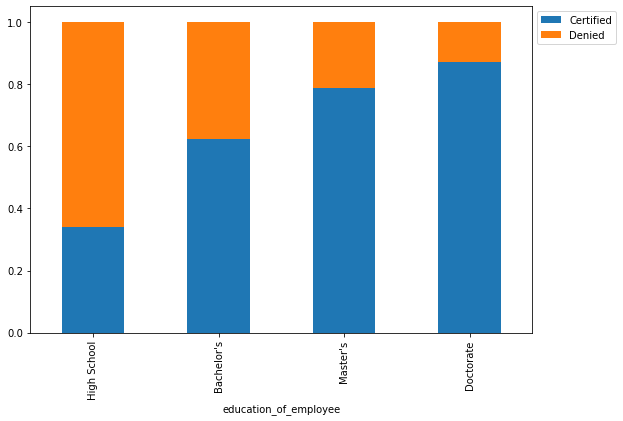

<IPython.core.display.Javascript object>

In [25]:
stacked_barplot(data=df1, predictor="education_of_employee", target="case_status")

- Candidates with doctorate degrees had an extremely high level of acceptance -- around 0.87.
- Candidates with only a high school degree had the lowest proportion -- only around 0.35 accepted.
- The trend here is that higher levels of educations appear to increase the probability of certification.

#### Has Job Experience vs. Case Status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


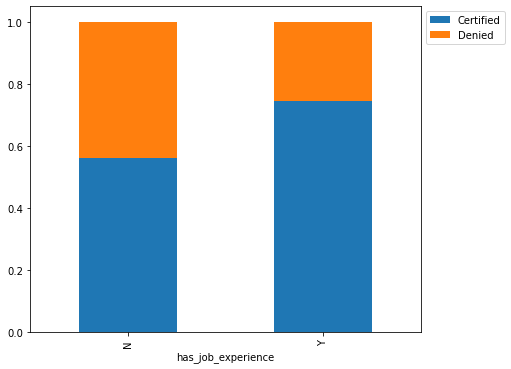

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(data=df1, predictor="has_job_experience", target="case_status")

- Candidates with job experience had a higher acceptance rate than those without (0.75 with experience accepted versus 0.58 accepted without).

#### Requires Job Training vs. Case Status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


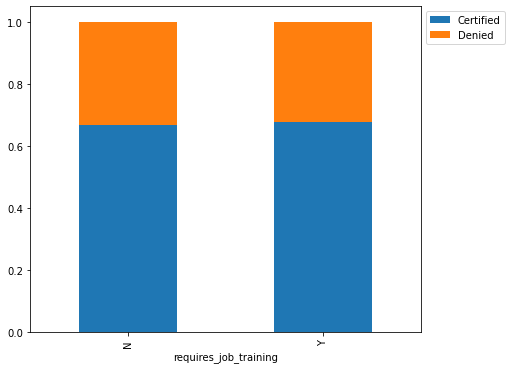

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(data=df1, predictor="requires_job_training", target="case_status")

- There does not appear to be a significant difference in the certification rate between candidates requiring job training and candidates that do not require job training.

#### Region of Employment vs. Case Status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


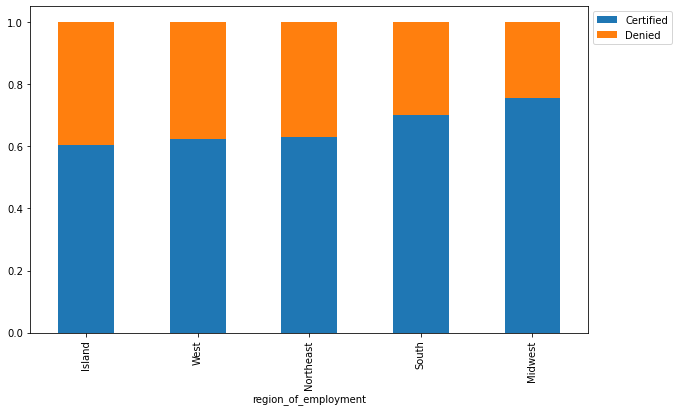

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(data=df1, predictor="region_of_employment", target="case_status")

- Candidates applying for jobs in the midwest had the highest certification rate (about 0.77).
- Candidates applying for jobs in island regions had the lowest rate (around 0.6).

#### Full Time Position vs. Case Status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


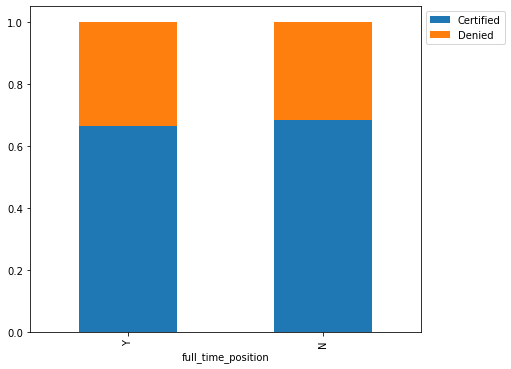

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(data=df1, predictor="full_time_position", target="case_status")

- There also does not appear to be a significant difference in acceptance rate between candidates seeking full or part time positions.

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in visa certification? 


case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


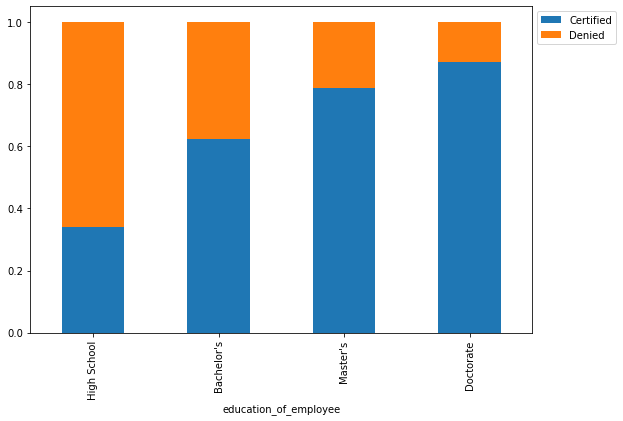

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data=df1, predictor="education_of_employee", target="case_status")

- As we discovered previously, those with doctorate degrees are much more likely to have their applications approved compared to candidates with only a high school education.
- Higher education levels do appear to increase the likelihood of acceptance.

#### 2. How does the visa status vary across different continents? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


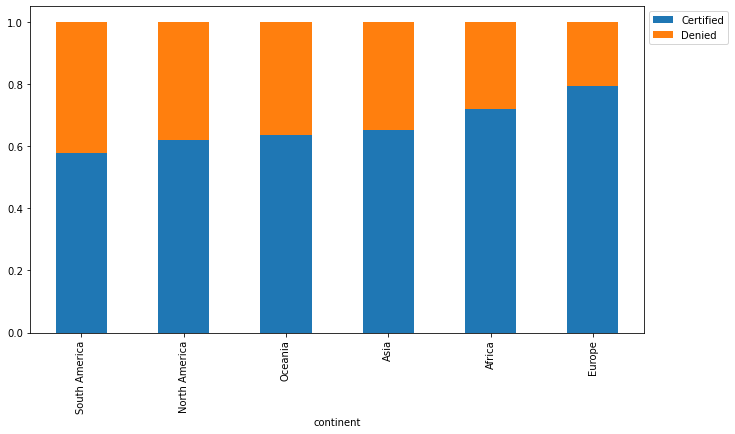

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(data=df1, predictor="continent", target="case_status")

- Candidates from South America had the lowest rate of acceptance.
- African candidates had the second highest acceptance rate.
- Candidates from Europe are most likely to have their applications approved.

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


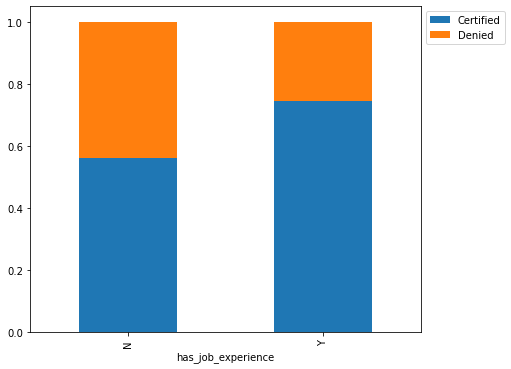

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(data=df1, predictor="has_job_experience", target="case_status")

- Those with work experience are more likely to have their visa application approved.
    - Around 75% of candidates with experience had their application approved, compared to around 58% of candidates without job experience.

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

Since I removed the wage unit column, we will have to use the original dataframe to answer this question.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


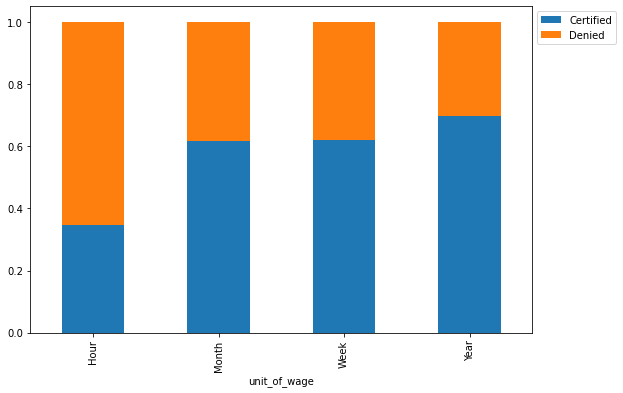

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data=df, predictor="unit_of_wage", target="case_status")

- Hourly employees are much less likely to have their application approved, whereas applicants with yearly wage units are most likely.
    - This follows the observation that full-time candidates are approved more often than part-time candidates. Compensation for full time jobs is usually measured in yearly salary.
- The acceptance rate of applicants paid monthly or weekly is roughly the same.

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

(0.0, 400000.0)

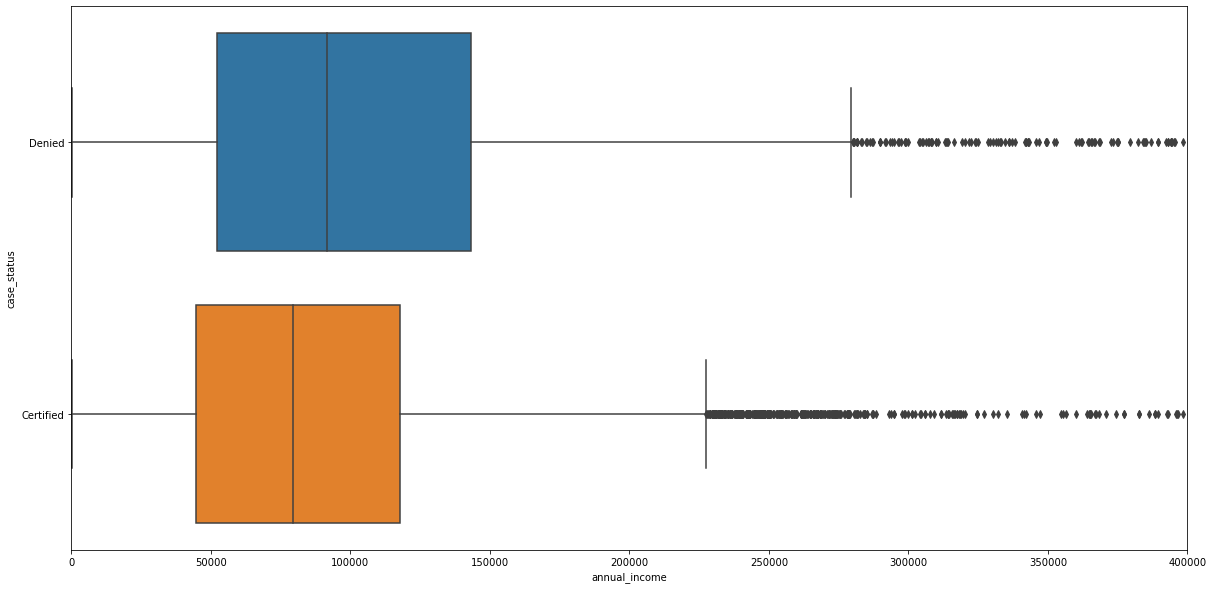

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x="annual_income", y="case_status")
plt.xlim(0, 400000)  # limiting the x range because of the high range of values

- The median annual income for approved visas is lower than the median for denied visas.
- The difference is not significant, and there could be subtle inaccuracies due to our conversion of all wages into yearly units.

## Data Preprocessing <a id='data_preprocessing'></a>

In [35]:
# checking for duplicate values
df.duplicated(subset=None, keep=False).sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values.

In [36]:
# creating dummy variables for categorical columns

df2 = pd.get_dummies(
    data=df1, columns=["continent", "education_of_employee", "region_of_employment"]
)

# dropping columns to prevent multicollinearity
df2.drop(
    [
        "continent_Oceania",
        "education_of_employee_High School",
        "region_of_employment_Island",
    ],
    axis=1,
    inplace=True,
)

# changing Y/N and Certified/Denied values to 1s and 0s
cols = [
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
    "case_status",
]
df2[cols] = df2[cols].replace({"Y": 1, "N": 0, "Certified": 1, "Denied": 0})
df2.sample(10, random_state=1)

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,annual_income,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
17639,1,0,567,1992,2.684291e+04,1,1,0,1,0,0,0,1,0,0,1,0,0,0
23951,0,0,619,1938,6.641998e+04,1,1,0,0,0,0,0,1,0,0,1,0,0,0
8625,0,0,2635,2005,1.577605e+06,1,1,0,1,0,0,0,0,0,1,0,0,1,0
20206,1,1,3184,1986,4.943580e+04,1,1,0,1,0,0,0,1,0,0,0,1,0,0
7471,1,0,4681,1928,4.986519e+04,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3433,1,0,222,1989,1.446805e+06,1,1,0,1,0,0,0,1,0,0,0,0,1,0
24440,0,1,3278,1994,2.049484e+05,1,0,0,0,1,0,0,0,0,0,0,0,1,0
12104,1,0,1359,1997,2.022370e+05,0,1,0,1,0,0,0,0,0,1,0,0,0,1
15656,0,0,2081,2003,1.117130e+05,1,0,0,1,0,0,0,1,0,0,0,0,0,1
23110,1,0,854,1998,7.909001e+05,1,0,0,0,0,1,0,1,0,0,0,1,0,0


<IPython.core.display.Javascript object>

- All of our values are now numeric and we can proceed with the rest of our preprocessing.

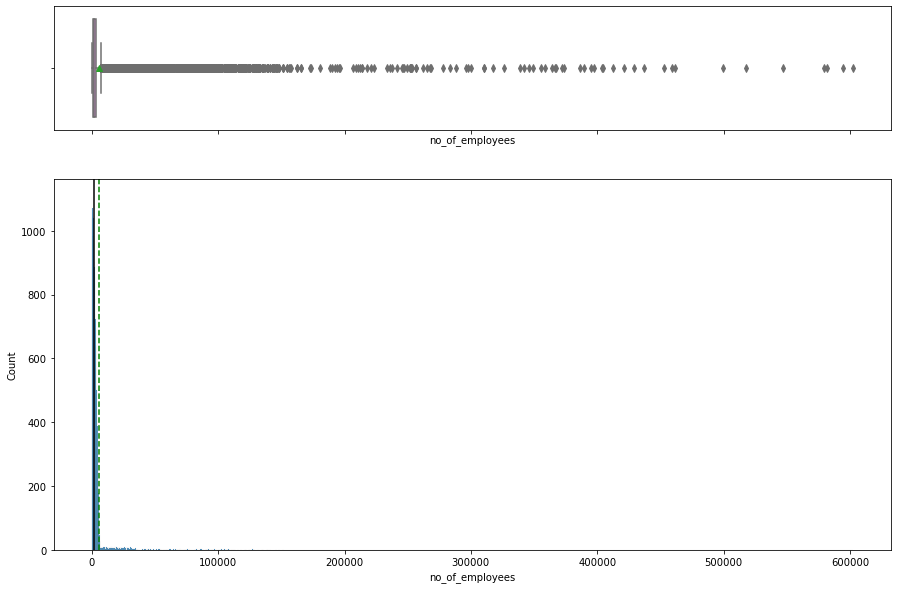

<IPython.core.display.Javascript object>

In [37]:
# creating another copy of the dataframe
df3 = df2.copy()

histogram_boxplot(data=df3, feature="no_of_employees")

- There are a significant amount of outliers in `no_of_employees`, but they are presumably true values so we will keep them.
- We will do the same with `yr_of_estab`.
- It makes sense that there are a few very large companies and a few very old companies, while most companies are smaller and newer.

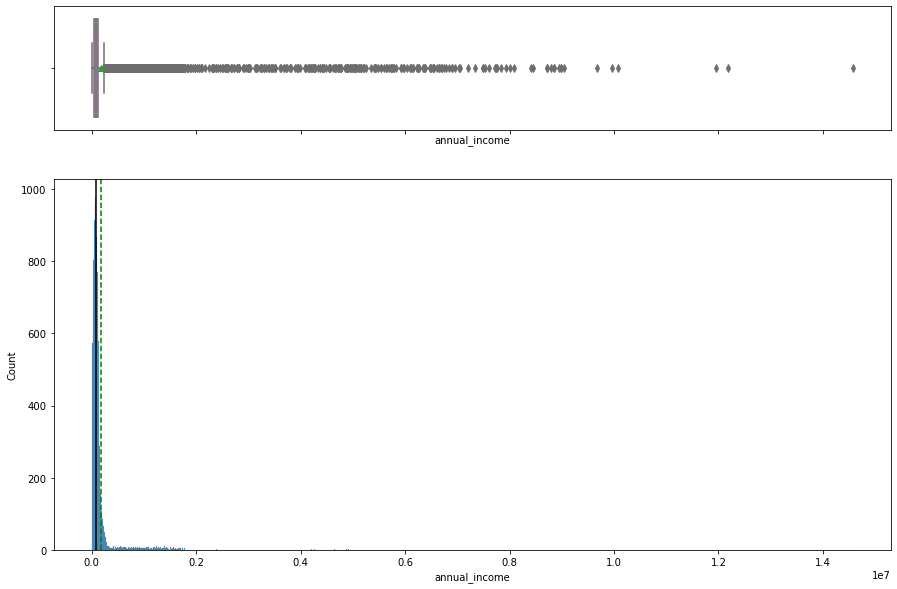

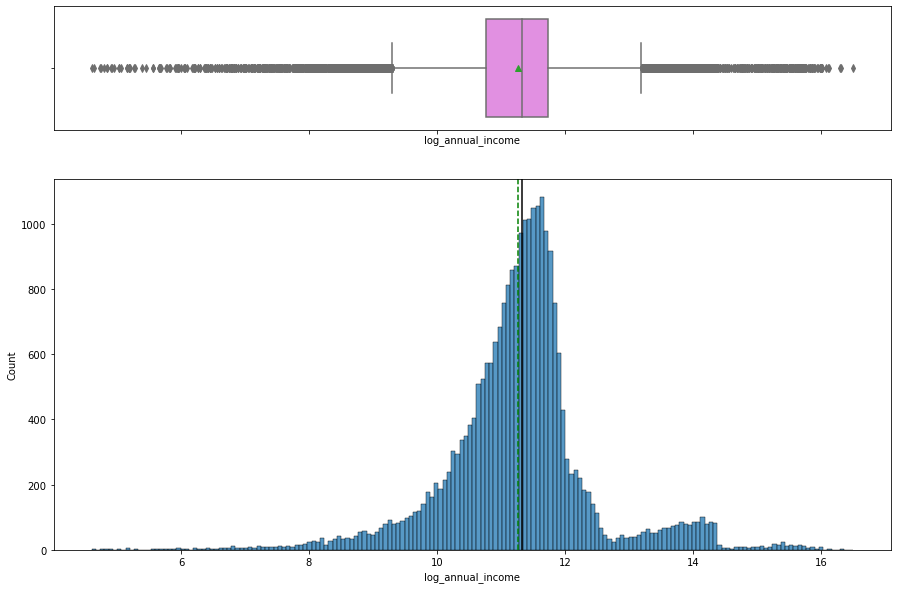

<IPython.core.display.Javascript object>

In [38]:
# viewing distribution of annual_income
histogram_boxplot(data=df3, feature="annual_income")

# performing a log transformation to reduce skewness
df3["log_annual_income"] = np.log(df3["annual_income"])
df3.drop("annual_income", axis=1, inplace=True)

# viewing transformed data
histogram_boxplot(data=df3, feature="log_annual_income")

- Here we applied a log transformation to the annual income variable in order to decrease the skewness of the distribution.

## EDA cont'd <a id='eda_contd'></a>

In [39]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
has_job_experience,25480.0,0.580926,0.493417,0.00000,0.000000,1.0000,1.000000,1.000000
requires_job_training,25480.0,0.115973,0.320199,0.00000,0.000000,0.0000,0.000000,1.000000
no_of_employees,25480.0,5667.089207,22877.917453,11.00000,1022.000000,2109.0000,3504.000000,602069.000000
yr_of_estab,25480.0,1979.409929,42.366929,1800.00000,1976.000000,1997.0000,2005.000000,2016.000000
full_time_position,25480.0,0.893760,0.308151,0.00000,1.000000,1.0000,1.000000,1.000000
case_status,25480.0,0.667896,0.470977,0.00000,0.000000,1.0000,1.000000,1.000000
continent_Africa,25480.0,0.021625,0.145458,0.00000,0.000000,0.0000,0.000000,1.000000
continent_Asia,25480.0,0.661735,0.473129,0.00000,0.000000,1.0000,1.000000,1.000000
continent_Europe,25480.0,0.146468,0.353582,0.00000,0.000000,0.0000,0.000000,1.000000
continent_North America,25480.0,0.129199,0.335427,0.00000,0.000000,0.0000,0.000000,1.000000


<IPython.core.display.Javascript object>

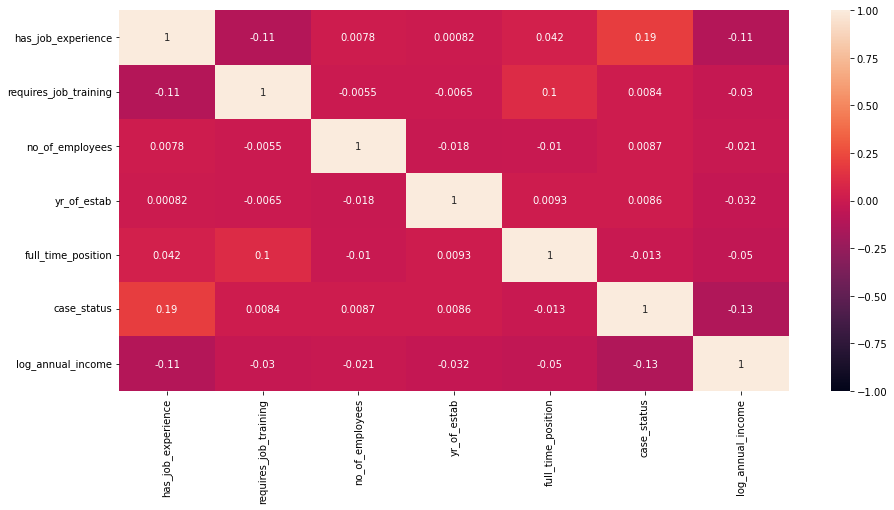

<IPython.core.display.Javascript object>

In [40]:
# creating a list of non-dummy variables
non_dummies = df3[
    [
        "has_job_experience",
        "requires_job_training",
        "no_of_employees",
        "yr_of_estab",
        "full_time_position",
        "case_status",
        "log_annual_income",
    ]
]
# creating a correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(non_dummies.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

- No significant correlations here.
- Case status and job experience have the highest correlation at 0.19.

## Building Bagging and Boosting Models <a id='bagging_boosting'></a>

#### Wrong Predictions:
- Predicting an application will be approved and it is denied.
- Predicting an application will be denied and it is approved.

#### What is more important?
- Predicting an application will be denied when it would actually be approved is worse than the opposite.
- Our model can predict an application will be approved and then it can be manually denied after further review. This is not a problem.
- But if our model assumes that an application will be denied when it would actually be approved, we exclude the application from the short list for approval and the application will not be manually addressed.

#### How to address this issue?
- We want to minimize false negatives, meaning we want to maximize **recall**.
- We will focus on recall when evaluating the performance of our models.

In [41]:
# function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


# function to calculate different metric scores of the model - accuracy, recall and precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # if the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [42]:
# splitting data into independent and dependent variables
X = df3.drop(["case_status"], axis=1)
y = df3["case_status"]

<IPython.core.display.Javascript object>

In [43]:
# creating training and testing data for models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [44]:
# viewing the failure/success ratio in order to determine class weights
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

#### Decision Tree

In [45]:
# creating the decision tree
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
)

<IPython.core.display.Javascript object>

In [46]:
# fitting the data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

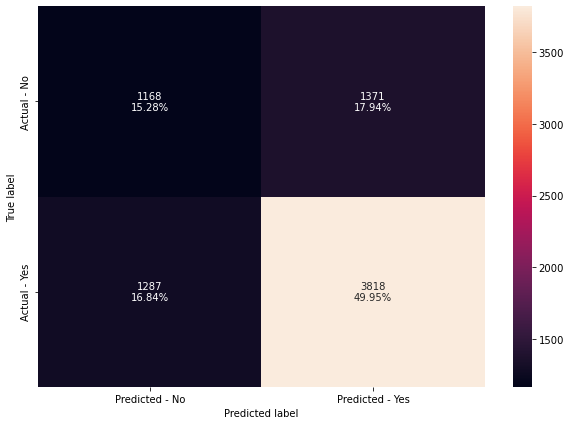

<IPython.core.display.Javascript object>

In [47]:
make_confusion_matrix(dtree, y_test)

- The model performance on testing data is rather underwhelming.
- 16.84% of the predictions were false negatives.

In [48]:
dtree_score = get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.652276295133438
Recall on training set :  1.0
Recall on test set :  0.7478942213516161
Precision on training set :  1.0
Precision on test set :  0.7357872422432068


<IPython.core.display.Javascript object>

- The model is overfitting the training data.
- Accuracy is lower than the ratio of confirmations to denials, so the model is performing poorly by this metric.
- Recall is 0.74, which is not great.

### Bagging Classifiers

#### Bagging Classifier

In [49]:
# creating the bagging classifier
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

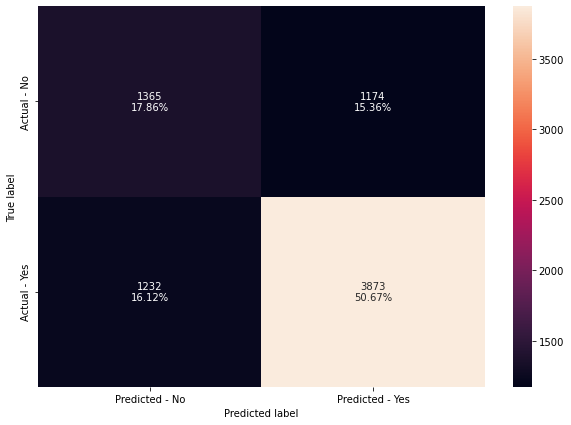

<IPython.core.display.Javascript object>

In [50]:
make_confusion_matrix(bagging, y_test)

- This model performed slightly better than the last.
- Our percentage of true positives jumped from 49.95% up to 50.67%.
- False negatives decreased from 16.84% to 16.12%.

In [51]:
bagging_score = get_metrics_score(bagging)

Accuracy on training set :  0.9850863422291993
Accuracy on test set :  0.685243328100471
Recall on training set :  0.9859817006631411
Recall on test set :  0.758667972575906
Precision on training set :  0.9916420430561418
Precision on test set :  0.7673865662769962


<IPython.core.display.Javascript object>

- The model still appears to be overfitting the training data.
- There is a small improvement in test recall from 0.747 to 0.759.

#### Bagging Classifier (Weighted)

In [52]:
# creating a weighted bagging classifier
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    random_state=1,
)
# fitting the data
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

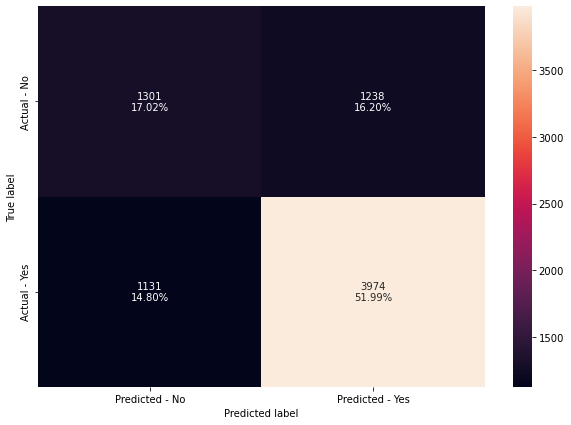

<IPython.core.display.Javascript object>

In [53]:
make_confusion_matrix(bagging_wt, y_test)

- True positives again increased from 50.67% on the non-weighted bagging classifier to 51.99% for this weighted bagging classifier.
- False negatives decreased to 14.80%.

In [54]:
bagging_wt_score = get_metrics_score(bagging_wt)

Accuracy on training set :  0.9848620766988114
Accuracy on test set :  0.6900837257980115
Recall on training set :  0.9860656425753379
Recall on test set :  0.7784524975514202
Precision on training set :  0.99122436925154
Precision on test set :  0.7624712202609363


<IPython.core.display.Javascript object>

- We are still seeing evidence of overfitting the training data.
- Recall and accuracy improved again.
- Recall is up to 0.779 from 0.759.

#### Random Forest Classifier

In [55]:
# creating the random forest classifier
rf = RandomForestClassifier(random_state=1)
# fitting the data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

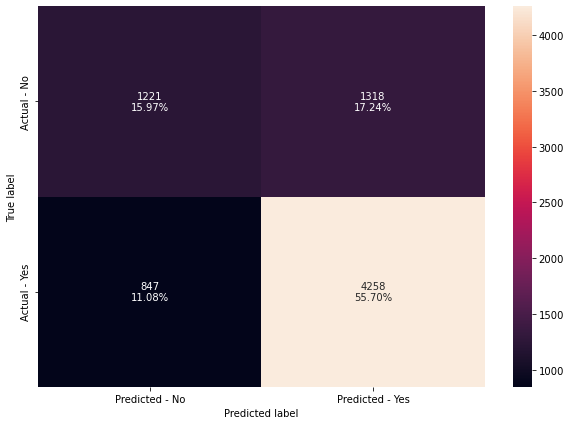

<IPython.core.display.Javascript object>

In [56]:
make_confusion_matrix(rf, y_test)

- We again see an improvement in true positives and false negatives.
- 55.7% TP and 11.08% FN are the best numbers we have seen yet.

In [57]:
rf_score = get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.7167713239141811
Recall on training set :  1.0
Recall on test set :  0.8340842311459353
Precision on training set :  1.0
Precision on test set :  0.7636298421807748


<IPython.core.display.Javascript object>

- The random forest classifier is definitely overfitting the training data.
- Recall is at its highest yet at 0.83.
- This is the largest jump in recall so far.

#### Random Forest (Weighted)

In [58]:
# creating the weighted random forest classifier
rf_wt = RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)
# fitting the data
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

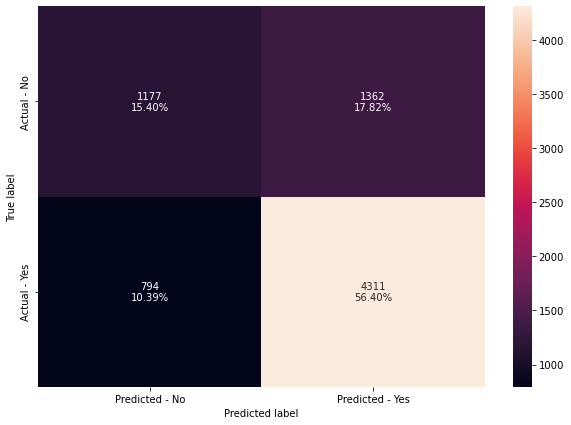

<IPython.core.display.Javascript object>

In [59]:
make_confusion_matrix(rf_wt, y_test)

- We see a marginal improvement in true positives and false negatives.

In [60]:
rf_wt_score = get_metrics_score(rf_wt)

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.717948717948718
Recall on training set :  1.0
Recall on test set :  0.8444662095984329
Precision on training set :  0.9999160651334564
Precision on test set :  0.7599153886832364


<IPython.core.display.Javascript object>

- Recall has nudged up slightly to 0.84, still an improvement.
- Still evidence of overfitting the training data.

### Boosting Classifiers

#### AdaBoost

In [61]:
# creating the adaboost model
abc = AdaBoostClassifier(random_state=1)
# fitting the data
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [62]:
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.7325633550123346
Accuracy on test set :  0.7252747252747253
Recall on training set :  0.8889448501636867
Recall on test set :  0.8854064642507345
Precision on training set :  0.7544347082709981
Precision on test set :  0.7489643744821872


<IPython.core.display.Javascript object>

- We are seeing much less overfitting and much more of a generalized prediction here.
- Recall has improved over all of the bagging classifiers.
- Recall is at its highest on the testing data at 0.885.

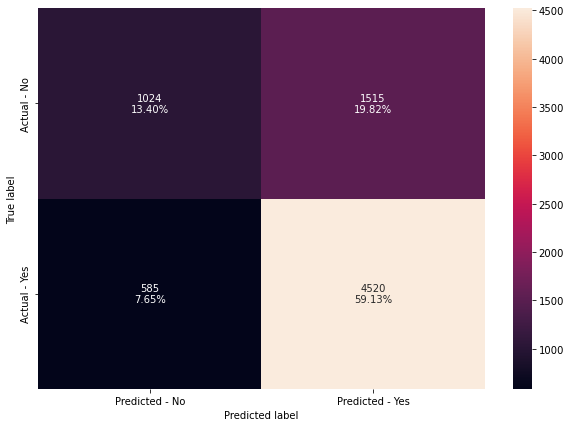

<IPython.core.display.Javascript object>

In [63]:
make_confusion_matrix(abc,y_test)


- As follows, true positives and false negatives have improved significantly.

#### Gradient Boosting

In [64]:
# creating the gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=1)
# fitting the data
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [65]:
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.750392464678179
Accuracy on test set :  0.7340397697540555
Recall on training set :  0.8725761772853186
Recall on test set :  0.8656219392752204
Precision on training set :  0.7798784604996624
Precision on test set :  0.7663891779396462


<IPython.core.display.Javascript object>

- Accuracy and precision have gone up slightly over the AdaBoost model, but our recall has dropped.
- Recall is our most salient metric, so this is not good.

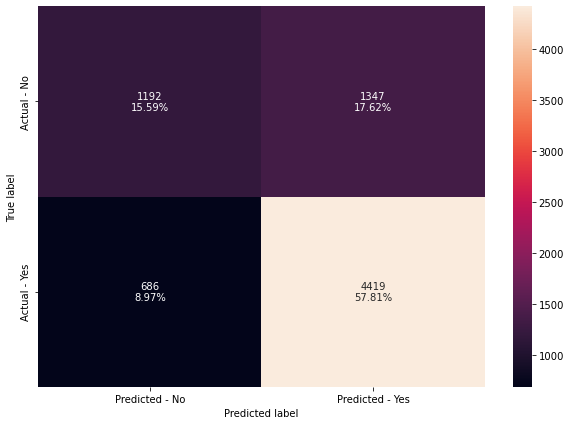

<IPython.core.display.Javascript object>

In [66]:
make_confusion_matrix(gbc, y_test)

- As follows, the confusion matrix is a slight downgrade from the previous model.

#### XGBoost

In [67]:
# creating the XGBoost classifier
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
# fitting the data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [68]:
xgb_score = get_metrics_score(xgb)

Accuracy on training set :  0.8358376317559991
Accuracy on test set :  0.7237048665620094
Recall on training set :  0.9231931503399647
Recall on test set :  0.8519098922624878
Precision on training set :  0.8452847590500346
Precision on test set :  0.7623137598597721


<IPython.core.display.Javascript object>

- The training recall is the highest of the boosting models, but the recall on the testing data is still lower than the recall on the testing data for the AdaBoost model.

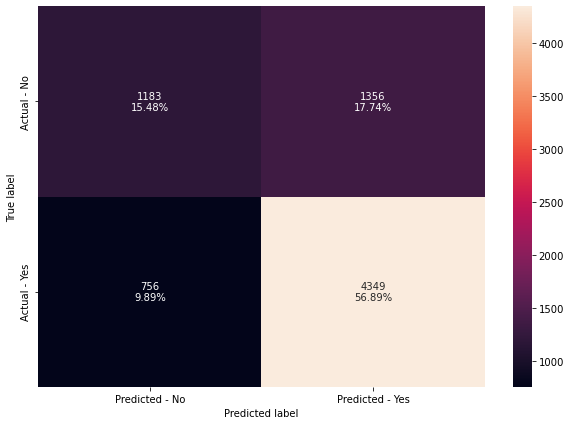

<IPython.core.display.Javascript object>

In [69]:
make_confusion_matrix(xgb, y_test)

- As follows, the confusion matrix here is not as good as the AdaBoost confusion matrix.

##  Hyperparameter Tuning <a id='hyperparameter_tuning'></a>

### Decision Tree Classifier

In [70]:
# creating the classifier
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.67, 1: 0.33}, random_state=1
)

# parameter grid
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# setting the metric to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# running grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# choosing the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# fitting the best algorithm to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Original Decision Tree

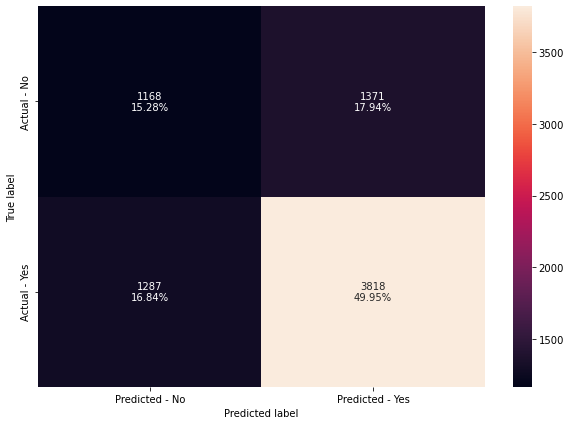

<IPython.core.display.Javascript object>

In [71]:
# reviewing the confusion matrix from the original decision tree model
make_confusion_matrix(dtree, y_test)

In [72]:
# getting the metrics scores for the original decision tree model
dtree_score = get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.652276295133438
Recall on training set :  1.0
Recall on test set :  0.7478942213516161
Precision on training set :  1.0
Precision on test set :  0.7357872422432068


<IPython.core.display.Javascript object>

#### Tuned Decision Tree

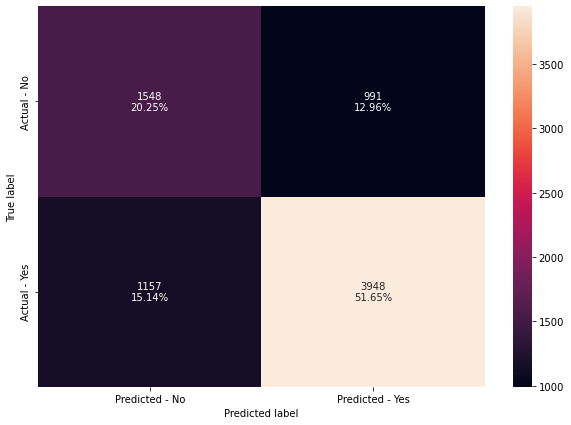

<IPython.core.display.Javascript object>

In [73]:
make_confusion_matrix(dtree_estimator, y_test)

In [74]:
# comparing both metrics
# getting the metrics scores for the original decision tree model
print("Original Decision Tree Metrics:", "\n")
dtree_score = get_metrics_score(dtree)

print("\n", "Tuned Decision Tree Metrics:", "\n")
# getting the metrics scores for the new tuned decision tree model
dtree_estimator_score = get_metrics_score(dtree_estimator)

Original Decision Tree Metrics: 

Accuracy on training set :  1.0
Accuracy on test set :  0.652276295133438
Recall on training set :  1.0
Recall on test set :  0.7478942213516161
Precision on training set :  1.0
Precision on test set :  0.7357872422432068

 Tuned Decision Tree Metrics: 

Accuracy on training set :  0.7277416461089931
Accuracy on test set :  0.7189952904238619
Recall on training set :  0.7757911525224545
Recall on test set :  0.7733594515181195
Precision on training set :  0.8087862081036142
Precision on test set :  0.799352095565904


<IPython.core.display.Javascript object>

- With the tuned model, we are getting a more generalized result without overfitting.
- Test recall has improved from 0.744 to 0.773 after tuning.
- Percentage of true positives and true negatives on the test set have increased.
- However, we have seen better performance from other models without tuning.

### Bagging Classifier

In [75]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)
param_grid = {
    "base_estimator": [cl1],
    "n_estimators": [5, 7, 15, 51, 101],
    "max_features": [0.7, 0.8, 0.9, 1],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="recall",
    cv=5,
)
grid.fit(X_train, y_train)

# choosing the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

<IPython.core.display.Javascript object>

#### Original Bagging Classifier

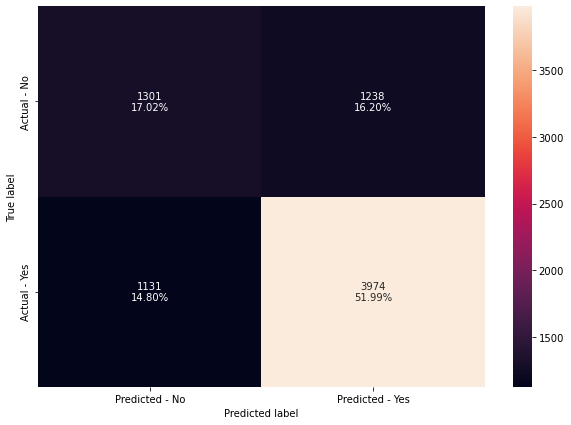

<IPython.core.display.Javascript object>

In [76]:
make_confusion_matrix(bagging_wt, y_test)

In [77]:
bagging_wt_score = get_metrics_score(bagging_wt)

Accuracy on training set :  0.9848620766988114
Accuracy on test set :  0.6900837257980115
Recall on training set :  0.9860656425753379
Recall on test set :  0.7784524975514202
Precision on training set :  0.99122436925154
Precision on test set :  0.7624712202609363


<IPython.core.display.Javascript object>

#### Tuned Bagging Classifier

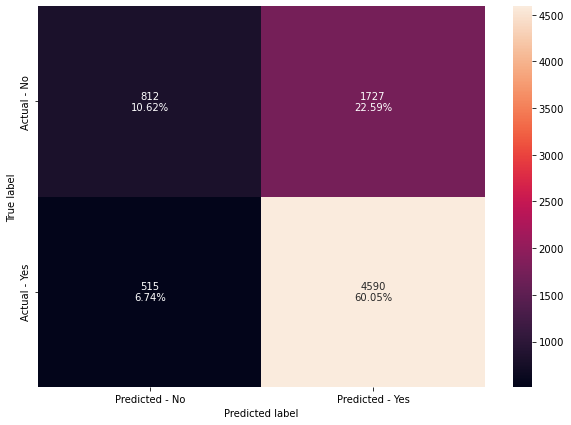

<IPython.core.display.Javascript object>

In [78]:
make_confusion_matrix(bagging_estimator, y_test)

In [79]:
# comparing both metrics
# getting the metrics scores for the original bagging classifier model
print("Original Bagging Classifier Metrics:", "\n")
bagging_wt_score = get_metrics_score(bagging_wt)

print("\n", "Tuned Bagging Classifier Metrics:", "\n")
# getting the metrics scores for the new tuned bagging classifier model
tuned_bagging_score = get_metrics_score(bagging_estimator)

Original Bagging Classifier Metrics: 

Accuracy on training set :  0.9848620766988114
Accuracy on test set :  0.6900837257980115
Recall on training set :  0.9860656425753379
Recall on test set :  0.7784524975514202
Precision on training set :  0.99122436925154
Precision on test set :  0.7624712202609363

 Tuned Bagging Classifier Metrics: 

Accuracy on training set :  1.0
Accuracy on test set :  0.7066980638409209
Recall on training set :  1.0
Recall on test set :  0.8991185112634672
Precision on training set :  1.0
Precision on test set :  0.7266107329428526


<IPython.core.display.Javascript object>

- After tuning, there is a higher percentage of true positives and a lower percenteage of false negatives.
- However, there are about 500 more false positives.
- All test metrics have improved, and recall has gone up considerably.
- The model is overfitting the training data, however.

### Random Forest Classifier

In [80]:
# creating the classifier
rf_estimator = RandomForestClassifier(random_state=1)

# parameter grid
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, "log2", "auto"],
    "max_samples": [0.7, 0.9, None],
}

# running the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# choosing the best parameter combination
rf_estimator = grid_obj.best_estimator_

# fitting the algorithm to the data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=5,
                       n_estimators=110, random_state=1)

<IPython.core.display.Javascript object>

#### Original Random Forest

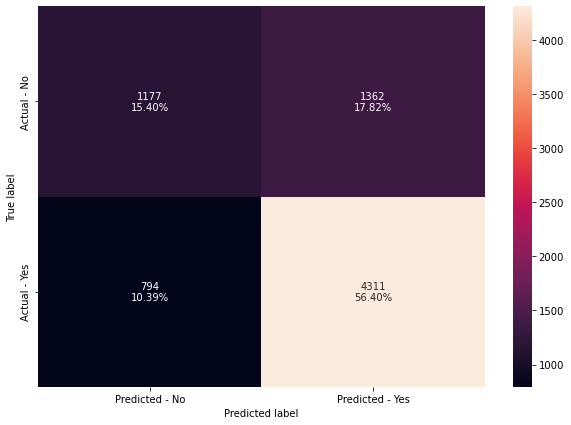

<IPython.core.display.Javascript object>

In [81]:
make_confusion_matrix(rf_wt, y_test)

In [82]:
rf_wt_score = get_metrics_score(rf_wt)

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.717948717948718
Recall on training set :  1.0
Recall on test set :  0.8444662095984329
Precision on training set :  0.9999160651334564
Precision on test set :  0.7599153886832364


<IPython.core.display.Javascript object>

#### Tuned Random Forest

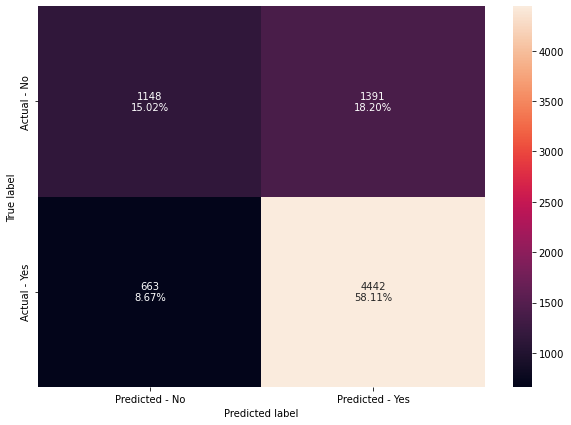

<IPython.core.display.Javascript object>

In [83]:
make_confusion_matrix(rf_estimator, y_test)

In [84]:
# comparing both metrics
# getting the metrics scores for the original random forest model
print("Original Random Forest Metrics:", "\n")
rf_wt_score = get_metrics_score(rf_wt)
print("\n", "Tuned Random Forest Classifier Metrics:", "\n")
# getting the metrics scores for the new tuned random forest model
tuned_random_forest = get_metrics_score(rf_estimator)

Original Random Forest Metrics: 

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.717948717948718
Recall on training set :  1.0
Recall on test set :  0.8444662095984329
Precision on training set :  0.9999160651334564
Precision on test set :  0.7599153886832364

 Tuned Random Forest Classifier Metrics: 

Accuracy on training set :  0.8069634447185468
Accuracy on test set :  0.7312925170068028
Recall on training set :  0.9184084613447494
Recall on test set :  0.8701273261508325
Precision on training set :  0.8157620041753654
Precision on test set :  0.7615292302417281


<IPython.core.display.Javascript object>

- The tuned model is overfitting the test data less. However, there still appears to be some overfitting in the tuned model.
- Test recall is up to 0.87 from 0.84.

### AdaBoost

In [85]:
# creating the classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# parameter grid
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# choosing scoring metric
acc_scorer = metrics.make_scorer(metrics.recall_score)

# running the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# choosing best parameter combination
abc_tuned = grid_obj.best_estimator_

# fitting the algorithm to the data
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

#### Original AdaBoost

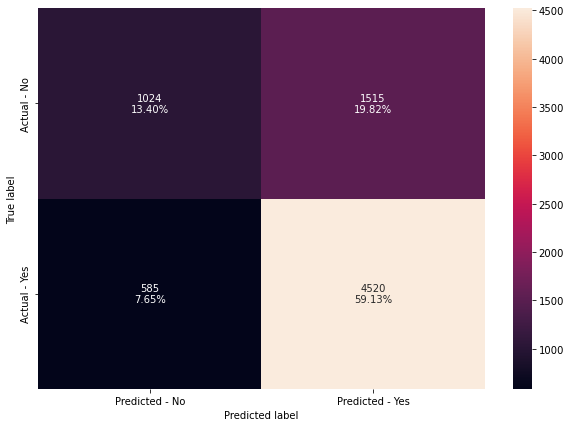

<IPython.core.display.Javascript object>

In [86]:
make_confusion_matrix(abc, y_test)

In [87]:
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.7325633550123346
Accuracy on test set :  0.7252747252747253
Recall on training set :  0.8889448501636867
Recall on test set :  0.8854064642507345
Precision on training set :  0.7544347082709981
Precision on test set :  0.7489643744821872


<IPython.core.display.Javascript object>

#### Tuned AdaBoost

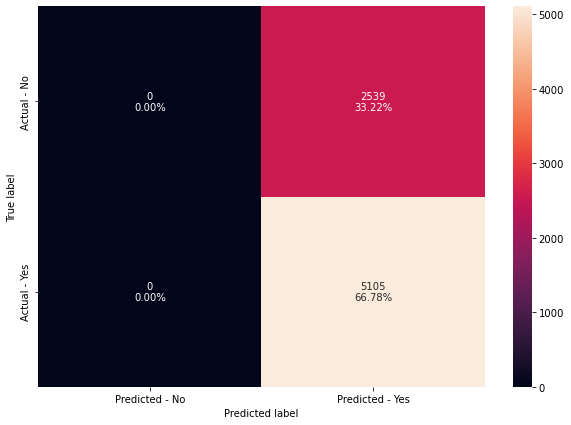

<IPython.core.display.Javascript object>

In [88]:
make_confusion_matrix(abc_tuned, y_test)

In [89]:
# comparing both metrics
# getting the metrics scores for the original adaboost model
print("Original AdaBoost Metrics:", "\n")
abc_score = get_metrics_score(abc)
print("\n", "Tuned AdaBoost Metrics:", "\n")
# getting the metrics scores for the new tuned adaboost model
abc_tuned_score = get_metrics_score(abc_tuned)

Original AdaBoost Metrics: 

Accuracy on training set :  0.7325633550123346
Accuracy on test set :  0.7252747252747253
Recall on training set :  0.8889448501636867
Recall on test set :  0.8854064642507345
Precision on training set :  0.7544347082709981
Precision on test set :  0.7489643744821872

 Tuned AdaBoost Metrics: 

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


<IPython.core.display.Javascript object>

- The tuned model is considerably worse.
- The model predicted 100% positives, resulting in 2539 false positives.
- This model is not useful in predicting outcomes.

### Gradient Boosting Classifier

In [90]:
# creating the classifier
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# parameter grid
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# choosing scoring metric
acc_scorer = metrics.make_scorer(metrics.recall_score)

# running the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# choosing best parameter combination
gbc_tuned = grid_obj.best_estimator_

# fitting the algorithm to the data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

#### Original Gradient Boost

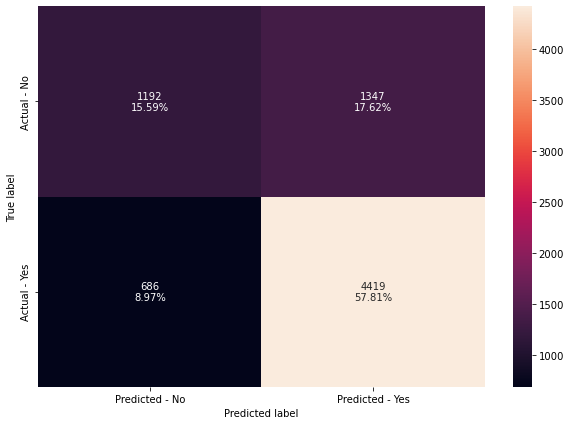

<IPython.core.display.Javascript object>

In [91]:
make_confusion_matrix(gbc, y_test)

In [92]:
gbc_score = get_metrics_score(gbc)

Accuracy on training set :  0.750392464678179
Accuracy on test set :  0.7340397697540555
Recall on training set :  0.8725761772853186
Recall on test set :  0.8656219392752204
Precision on training set :  0.7798784604996624
Precision on test set :  0.7663891779396462


<IPython.core.display.Javascript object>

#### Tuned Gradient Boost

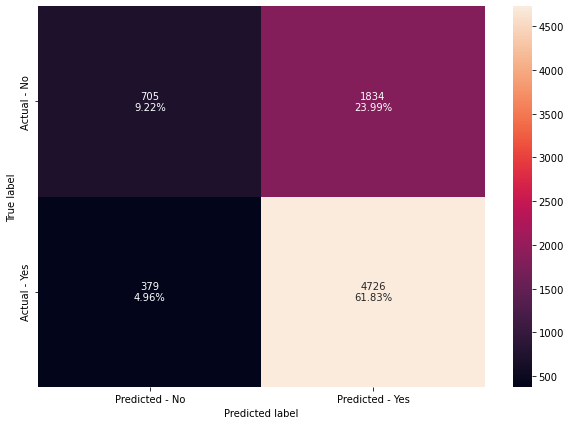

<IPython.core.display.Javascript object>

In [93]:
make_confusion_matrix(gbc_tuned, y_test)

In [94]:
# comparing both metrics
# getting the metrics scores for the original gradient boost model
print("Original Gradient Boost Metrics:", "\n")
gbc_score = get_metrics_score(gbc)
print("\n", "Tuned Gradient Boost Metrics:", "\n")
# getting the metrics scores for the new tuned gradient boost model
gbc_tuned_score = get_metrics_score(gbc_tuned)

Original Gradient Boost Metrics: 

Accuracy on training set :  0.750392464678179
Accuracy on test set :  0.7340397697540555
Recall on training set :  0.8725761772853186
Recall on test set :  0.8656219392752204
Precision on training set :  0.7798784604996624
Precision on test set :  0.7663891779396462

 Tuned Gradient Boost Metrics: 

Accuracy on training set :  0.7164162368244001
Accuracy on test set :  0.7104918890633176
Recall on training set :  0.9278938974229833
Recall on test set :  0.9257590597453477
Precision on training set :  0.7247098931357766
Precision on test set :  0.7204268292682927


<IPython.core.display.Javascript object>

- There are no signs of overfitting. Test and training scores are very similar.
- The test recall is 0.926, the highest non-overfitted result we have seen.
- This is a good model for our purposes.

### XGBoost Classifier

- Unfortunately, the XGBoost Classifier grid search ran for hours without completing.
- For the sake of time, I will not tune this model. I plan to revisit this section in the future.

## Model Performance Comparison and Conclusions <a id='model_comparison'></a>

In [95]:
# creating a dataframe to compare model scores
index = [
    "Accuracy (train)",
    "Accuracy (test)",
    "Recall (train)",
    "Recall (test)",
    "Precision (train)",
    "Precision (test)",
]
comp = pd.DataFrame(
    {
        "Decision Tree": dtree_score,
        "Decision Tree Tuned": dtree_estimator_score,
        "Bagging Classifier": bagging_wt_score,
        "Bagging Classifier Tuned": tuned_bagging_score,
        "Random Forest": rf_wt_score,
        "Random Forest Tuned": tuned_random_forest,
        "AdaBoost": abc_score,
        "AdaBoost Tuned": abc_tuned_score,
        "Gradient Boost": gbc_score,
        "Gradient Boost Tuned": gbc_tuned_score,
        "XGBoost": xgb_score,
    },
    index=index,
)
comp

,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Tuned,AdaBoost,AdaBoost Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost
Accuracy (train),1.000000,0.727742,0.984862,1.000000,0.999944,0.806963,0.732563,0.667919,0.750392,0.716416,0.835838
Accuracy (test),0.652276,0.718995,0.690084,0.706698,0.717949,0.731293,0.725275,0.667844,0.734040,0.710492,0.723705
Recall (train),1.000000,0.775791,0.986066,1.000000,1.000000,0.918408,0.888945,1.000000,0.872576,0.927894,0.923193
Recall (test),0.747894,0.773359,0.778452,0.899119,0.844466,0.870127,0.885406,1.000000,0.865622,0.925759,0.851910
Precision (train),1.000000,0.808786,0.991224,1.000000,0.999916,0.815762,0.754435,0.667919,0.779878,0.724710,0.845285
Precision (test),0.735787,0.799352,0.762471,0.726611,0.759915,0.761529,0.748964,0.667844,0.766389,0.720427,0.762314


<IPython.core.display.Javascript object>

- The **tuned gradient boost model** had the best test recall and also had no signs of overfitting.
- The XGBoost model scored better on accuracy and precision, but test recall was less than the tuned gradient boost test recall.
- The decision tree, tuned bagging classifier, and the random forest all overfitted the training data.
- The tuned random forest also scored well in all areas, but looks to have slightly overfitted the training data.

## Feature Importance <a id='feature_importance'></a>

In [96]:
# finding the feature importances for the tuned gradient boost model
print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
education_of_employee_Master's    0.231697
has_job_experience                0.213905
log_annual_income                 0.133237
education_of_employee_Doctorate   0.128819
continent_Europe                  0.061503
education_of_employee_Bachelor's  0.050966
region_of_employment_Midwest      0.033776
yr_of_estab                       0.022415
no_of_employees                   0.020154
region_of_employment_West         0.018219
continent_North America           0.017175
region_of_employment_South        0.016699
region_of_employment_Northeast    0.012480
continent_Asia                    0.011927
requires_job_training             0.008770
continent_South America           0.007855
full_time_position                0.007700
continent_Africa                  0.002705


<IPython.core.display.Javascript object>

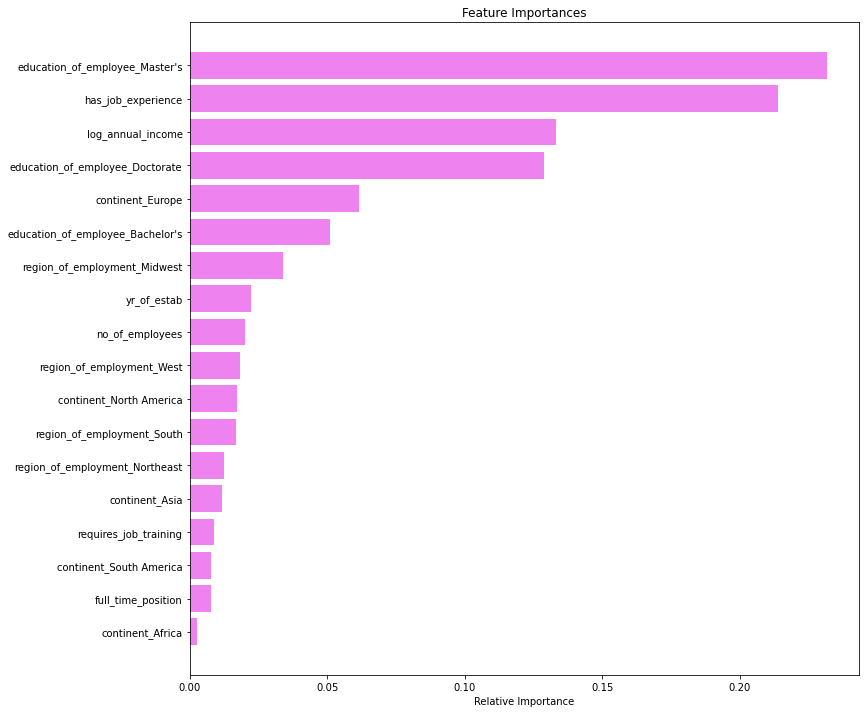

<IPython.core.display.Javascript object>

In [97]:
# plotting the feature importances
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to our model:
- Having a master's degree and job experience are two important factors in determining whether a visa application is approved or denied. This corroborates our findings during EDA.
- High salary and education levels (i.e., also having a doctorate degree) are also important factors, again underscoring our previous observations.
- Whether or not an applicant is from Europe is the fifth most important factor in determining the application's outcome.

## Actionable Insights and Recommendations <a id='insights_recs'></a>

### Insights:
- Based on our model, education, experience, and yearly compensation are all important factors when considering a visa application.
- **Education level appears to be the most important factor when considering applications.**
    - Those with post-undergraduate degrees are much more likely to have their visas approved.
    - These people are likely applying for specialized jobs with fewer colleagues competing for the same positions.
    - Masters degrees and doctorate degrees had the most influence, followed by bachelor degrees.
- **Those with job experience are also much more likely to have their visas approved.**
    - These people have a proven track record and are most likely to successfully maintain their jobs and provide value in their roles.
- A higher amount of annual compensation also increases the likelihood of approval.
    - People applying for higher paying jobs are probably sought after candidates.
- More European applications are approved as well.
- Applications for jobs in the midwest also had a higher rate of acceptance.
- The next two more important factors were year the company was established and how many employees the companies have.
    - Those applying for jobs at older and larger companies are more likely to be approved.
    
### Recommendations:
- In order to quickly judge an applicant, we can construct a general profile of a suitable candidate. 
- **A suitable candidate**:
    - Has a masters and/or doctorate degree.
    - At the very least has a bachelor's degree.
    - Has job experience.
    - Will earn a relatively high salary.
    - Is applying from Europe.
    - Is applying for a job in the West or Midwest.
    - Is applying at a large and/or old company.
- Using this profile, the OFLC can flag applications with matching criteria for further review.